In [1]:
import statistics as stat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Customer_Trust_in_AI.csv")
df

,ResponseId,Q1,Q2,Q3,Q4,Q13,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,AI Trust Score
0,R_1N3DPujKTQkfB78,30-39,"$0 - $9,999",2,No,1320,1,3,3,1,4,1,1,5,19
1,R_6syddYFXXoo59eS,17 or younger,"$110,000 or more",2,Yes,60,3,2,4,2,5,1,4,3,24
2,R_dgmioP3JvmUcNNk,21-29,"$10,000 - $29,000",None,Yes,900,3,5,1,4,2,2,5,3,25
3,R_3VKk9ZR4wPdIDrw,60 or older,"$10,000 - $29,000",3,No,1260,2,1,4,1,4,5,2,4,23
4,R_cMg4kVZ2wG5jUx0,30-39,"$30,000 - $49,000",2,Yes,1320,4,1,5,5,4,5,4,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,R_4NJuRDImhjAXZNY,60 or older,"$90,000 - $109,000",None,No,260,3,4,1,3,1,3,1,2,18
1046,R_9sFQzFZcfLQkYwC,60 or older,"$50,000 - $69,000",4 or more,Yes,1020,1,5,3,1,3,4,1,5,23
1047,R_37TRBcJE6TjXdtA,21-29,"$70,000 - $89,000",2,Yes,1560,5,1,5,3,5,1,3,2,25
1048,R_8bMygiQFJN1NMuG,18-20,"$30,000 - $49,000",4 or more,No,1660,2,1,4,4,3,1,2,4,21


In [3]:
#potential retained customers - customers that would make another purchase soon.

# final_cols = ['ResponseId','Q1','Q2','Q3','Q4','Q13','AI Trust Score']
# df = df[df.columns.intersection(final_cols)]

df.reset_index(drop=True,inplace=True)

df.drop([0],inplace=True)
df

,ResponseId,Q1,Q2,Q3,Q4,Q13,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,AI Trust Score
1,R_6syddYFXXoo59eS,17 or younger,"$110,000 or more",2,Yes,60,3,2,4,2,5,1,4,3,24
2,R_dgmioP3JvmUcNNk,21-29,"$10,000 - $29,000",None,Yes,900,3,5,1,4,2,2,5,3,25
3,R_3VKk9ZR4wPdIDrw,60 or older,"$10,000 - $29,000",3,No,1260,2,1,4,1,4,5,2,4,23
4,R_cMg4kVZ2wG5jUx0,30-39,"$30,000 - $49,000",2,Yes,1320,4,1,5,5,4,5,4,5,33
5,R_cSHnKd7xtyxfW5w,60 or older,"$90,000 - $109,000",2,No,0,2,5,2,3,2,5,1,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,R_4NJuRDImhjAXZNY,60 or older,"$90,000 - $109,000",None,No,260,3,4,1,3,1,3,1,2,18
1046,R_9sFQzFZcfLQkYwC,60 or older,"$50,000 - $69,000",4 or more,Yes,1020,1,5,3,1,3,4,1,5,23
1047,R_37TRBcJE6TjXdtA,21-29,"$70,000 - $89,000",2,Yes,1560,5,1,5,3,5,1,3,2,25
1048,R_8bMygiQFJN1NMuG,18-20,"$30,000 - $49,000",4 or more,No,1660,2,1,4,4,3,1,2,4,21


In [4]:
#values appear to be normally distributed
scores = [int(i) for i in df['AI Trust Score']]
spent = [int(i) for i in df['Q13']]
print('Scores Median:',stat.median(df['AI Trust Score']),'\nScores Mean:',stat.mean(scores),
      '\nSpent Median:',stat.median(df['Q13']), '\nSpent Mean:',stat.mean(spent))


Scores Median: 24 
Scores Mean: 23.869399428026693 
Spent Median: 1060 
Spent Mean: 1033.155386081983


In [5]:
print(stat.median(df['Q5']),stat.median(df['Q6']),stat.median(df['Q7']),
      stat.median(df['Q8']),stat.median(df['Q10']),stat.median(df['Q11']),
     stat.median(df['Q12']))

3 3 3 3 3 3 3


In [6]:
incomes = [i.replace('$','') for i in df['Q2']]
df['Q2'] = incomes


ages = {
    '17 or younger':1,
    '18-20':2,
    '21-29':3,
    '30-39':4,
    '40-49':5,
    '50-59':6,
    '60 or older':7
}

cols = df.columns[df.dtypes == 'object']
df[cols] = df[cols].replace(ages)

incomes = {
    '0 - 9,999':1,
    '10,000 - 29,000':2,
    '30,000 - 49,000':3,
    '50,000 - 69,000':4,
    '70,000 - 89,000':5,
    '90,000 - 109,000':6,
    '110,000 or more':7
}

cols = df.columns[df.dtypes == 'object']
df[cols] = df[cols].replace(incomes)

dep = {
    'None':0,
    '1':1,
    '2':2,
    '3':3,
    '4 or more':4
}

cols = df.columns[df.dtypes == 'object']
df[cols] = df[cols].replace(dep)

is_returning = {
    'No':0,
    'Yes':1
}

cols = df.columns[df.dtypes == 'object']
df[cols] = df[cols].replace(is_returning)


df

,ResponseId,Q1,Q2,Q3,Q4,Q13,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,AI Trust Score
1,R_6syddYFXXoo59eS,1,7,2,1,60,3,2,4,2,5,1,4,3,24
2,R_dgmioP3JvmUcNNk,3,2,0,1,900,3,5,1,4,2,2,5,3,25
3,R_3VKk9ZR4wPdIDrw,7,2,3,0,1260,2,1,4,1,4,5,2,4,23
4,R_cMg4kVZ2wG5jUx0,4,3,2,1,1320,4,1,5,5,4,5,4,5,33
5,R_cSHnKd7xtyxfW5w,7,6,2,0,0,2,5,2,3,2,5,1,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,R_4NJuRDImhjAXZNY,7,6,0,0,260,3,4,1,3,1,3,1,2,18
1046,R_9sFQzFZcfLQkYwC,7,4,4,1,1020,1,5,3,1,3,4,1,5,23
1047,R_37TRBcJE6TjXdtA,3,5,2,1,1560,5,1,5,3,5,1,3,2,25
1048,R_8bMygiQFJN1NMuG,2,3,4,0,1660,2,1,4,4,3,1,2,4,21


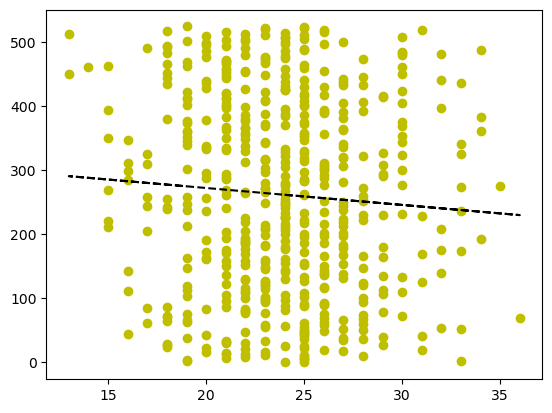

In [7]:
'''
using AI Trust Score to predict the number of customers who "like", 
or atleast, don't "dislike" AI Tools among retained customers.
'''

df = df[(df['Q4'] == 1)]

y = [i for i in range(len(df['ResponseId']))]
x = [int(i) for i in df['AI Trust Score']]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)

'''
Looking a the regression below, we can see a slight negative correlation.
We can conclude that as score increases, number of customers goes down.
It is important to note that this large spread of scatter plots indicates
several linear regression assumption violations. 
There is a vague correlation.

The question now is, can I make it better or is this as good as it gets with my given question data?
'''

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

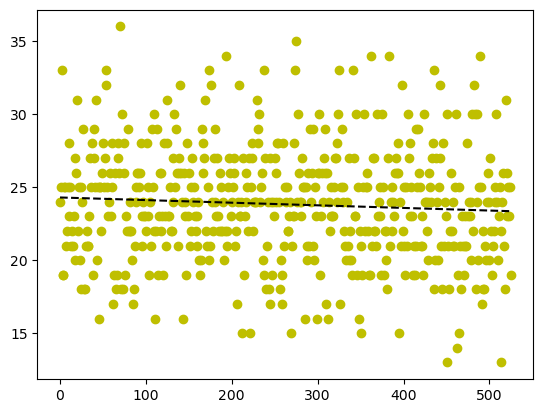

In [8]:
'''
What happens when we try to predict "AI Trust" using the number of customers retained?
For every customer retained we see our Trust score decrease.
'''

df = df[(df['Q4'] == 1)]

x = [i for i in range(len(df['ResponseId']))]
y = [int(i) for i in df['AI Trust Score']]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

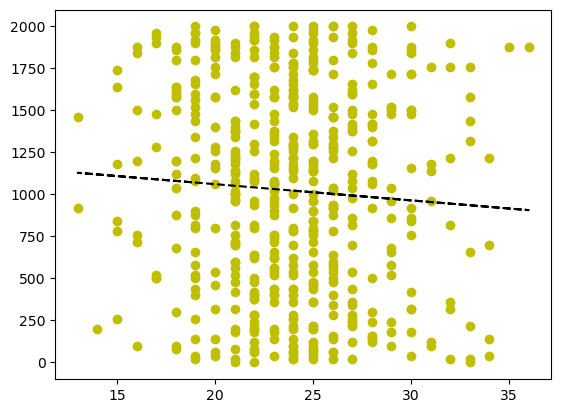

In [9]:
'''
Determining long term growth based on customers giving their word is a gambit.
Ideally, this regression model would benefit from sales data.
Saying something is one thing, but doing something purchasing or not purchasing something is another.
Another question was added. "How much did you spend in the last 3 months?"
'''

spent_df = df[(df['Q4'] == 1)]

y = [i for i in spent_df['Q13']]
x = [int(i) for i in spent_df['AI Trust Score']]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)

'''
Looking at the regression model below, the regression line implies that sales go down as customer as AI Trust Increases.
'''

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

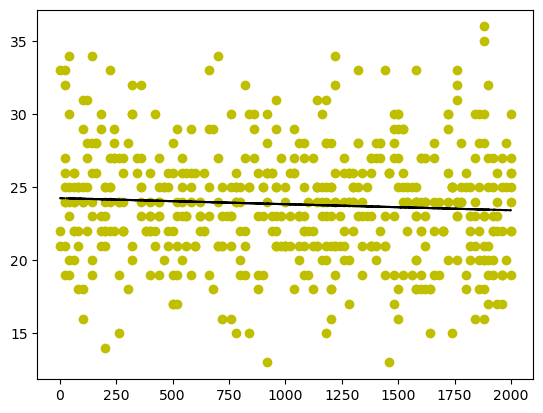

In [10]:
'''
Interestingly enough, flipping our DV and IV uses sales to predict "AI Trust."
I think my original hypothesis was flawed and this model paints a better picture.
As our sales increase, AI trust decreases.
'''

spent_df = df[(df['Q4'] == 1)]

x = [i for i in spent_df['Q13']]
y = [int(i) for i in spent_df['AI Trust Score']]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)

'''
Of course, this does not apply that we should remove AI tools to make sales.
If Customer demograhpics such as income and age are strong factors in our model,
we could tweak the usage of AI tools to better satisfy our customers.
I.E, assuming older customers distrust AI tools, then when they use our site we limit our AI.
'''

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

In [11]:
df.to_csv(r'regression_data.csv',header=True, sep=',')
df

,ResponseId,Q1,Q2,Q3,Q4,Q13,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,AI Trust Score
1,R_6syddYFXXoo59eS,1,7,2,1,60,3,2,4,2,5,1,4,3,24
2,R_dgmioP3JvmUcNNk,3,2,0,1,900,3,5,1,4,2,2,5,3,25
4,R_cMg4kVZ2wG5jUx0,4,3,2,1,1320,4,1,5,5,4,5,4,5,33
6,R_08scWtxY8agM44e,6,6,0,1,260,1,1,4,3,1,2,2,5,19
8,R_6mUunrYbSWfVjO6,3,7,0,1,440,3,2,1,2,2,2,4,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,R_3wywXq1nXMkZQRo,4,7,3,1,440,4,1,3,4,1,3,2,5,23
1044,R_cI0lo0rTG6lQlW6,3,7,0,1,780,4,2,5,1,2,5,2,4,25
1046,R_9sFQzFZcfLQkYwC,7,4,4,1,1020,1,5,3,1,3,4,1,5,23
1047,R_37TRBcJE6TjXdtA,3,5,2,1,1560,5,1,5,3,5,1,3,2,25
